In [1]:
import pandas as pd

df_ = pd.read_csv('c:/Users/chanyoung/Desktop/young_workspace/ba_module1/ML_pjt/BANK_pjt/data_for_bank.csv',index_col=0)
df_.index.name = 'Date'

# 결과 확인
df_

,Open,High,Low,Close,Volume,log_return,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240
Date,,,,,,,,,,,,,
2014-12-23,7290.0,7290.0,7250.0,7290.0,2424.0,0.002060,1,7252.0,7275.5,7511.166667,7756.750000,8018.000000,7917.687500
2014-12-24,7300.0,7365.0,7265.0,7365.0,21753.0,0.010236,1,7269.0,7264.5,7491.000000,7741.333333,8015.125000,7912.687500
2014-12-26,7400.0,7420.0,7360.0,7385.0,7384.0,0.002712,1,7292.0,7271.0,7472.333333,7726.416667,8013.458333,7909.062500
2014-12-29,7465.0,7465.0,7320.0,7340.0,10208.0,-0.006112,0,7319.0,7284.0,7454.666667,7713.583333,8011.916667,7905.520833
2014-12-30,7375.0,7375.0,7110.0,7135.0,30329.0,-0.028327,0,7331.0,7287.5,7441.666667,7703.583333,8010.083333,7902.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05,7950.0,8075.0,7935.0,7985.0,393780.0,-0.009349,0,8041.0,8262.5,8236.166667,7675.500000,7043.416667,6568.604167
2024-04-08,8000.0,8130.0,7980.0,8055.0,748528.0,0.008728,1,8000.0,8190.5,8241.833333,7700.833333,7056.083333,6576.270833
2024-04-09,8085.0,8140.0,7985.0,8030.0,423717.0,-0.003108,0,8000.0,8137.5,8246.166667,7727.583333,7069.416667,6583.479167


In [2]:
# 모든 열에 대해 NaN 값을 이전의 유효한 값으로 대체
df_.fillna(method='ffill', inplace=True)

# # 'date' 열과 'temperature' 열을 각각 처리
# df['date'] = df['date'].fillna(method='ffill')
# df['temperature'] = df['temperature'].fillna(method='ffill')

In [3]:
# 특성과 타겟 분리
X = df_.drop('target', axis=1)
y = df_['target']

In [4]:
# 데이터를 학습 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 랜덤 포레스트 분류기 초기화
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 랜덤 포레스트 모델로 학습
rf.fit(X_train, y_train)

# 특성 중요도를 사용하여 특성 선택
selector = SelectFromModel(rf, prefit=True, threshold='mean')  # 'mean'은 중요도의 평균 이상인 특성만 선택
X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

c:\Users\chanyoung\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\chanyoung\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
# 모델 정의
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear')
    
}

In [8]:
# 각 모델에 대한 성능 평가 및 교차 검증
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # 데이터 스케일링
        ('classifier', model)
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f'{name} Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')

# 테스트 세트에서 최종 모델 평가
for name, model in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'{name} - Test Set Performance:')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9956 (+/- 0.0037)
Random Forest Accuracy: 0.9612 (+/- 0.0762)
Gradient Boosting Accuracy: 1.0000 (+/- 0.0000)
SVM Accuracy: 0.9918 (+/- 0.0073)
Logistic Regression - Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       223

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458

Random Forest - Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       223

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458

Gradient Boosting - Test Set Performance:
              precision    recall  f1-score   

데이터를 로드하고 전처리를 수행합니다.  
네 가지 분류 모델을 정의하고, 각각을 파이프라인에 추가하여 스케일링과 함께 실행합니다.  
각 모델에 대해 5-겹 교차 검증을 사용하여 정확도를 평가합니다.  
테스트 세트에서 각 모델의 성능을 최종 평가하고, 성능 지표를 출력합니다.  

In [9]:
# Import XGBoost Classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [10]:
from sklearn.model_selection import cross_val_score
# Define cross_val function with classifer and num_splits as input
def cross_val(classifier,X=X,y=y, num_splits=10):
    
    # Initialize classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.2f' % (scores.mean()))

In [11]:
# Use cross_val function to score XGBoost
cross_val(XGBClassifier(),X=X,y=y)#, verbosity=0

Accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy mean: 1.00


In [12]:
cross_val(LGBMClassifier(),X=X,y=y)

[LightGBM] [Info] Number of positive: 1005, number of negative: 1055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 2060, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487864 -> initscore=-0.048553
[LightGBM] [Info] Start training from score -0.048553
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [13]:
cross_val(CatBoostClassifier(n_estimators=100),X=X,y=y)

Learning rate set to 0.115866
0:	learn: 0.5914226	total: 147ms	remaining: 14.6s
1:	learn: 0.5151449	total: 153ms	remaining: 7.49s
2:	learn: 0.4467052	total: 157ms	remaining: 5.08s
3:	learn: 0.3907515	total: 161ms	remaining: 3.88s
4:	learn: 0.3438112	total: 166ms	remaining: 3.15s
5:	learn: 0.3031152	total: 170ms	remaining: 2.67s
6:	learn: 0.2697955	total: 194ms	remaining: 2.58s
7:	learn: 0.2390732	total: 198ms	remaining: 2.28s
8:	learn: 0.2142254	total: 203ms	remaining: 2.05s
9:	learn: 0.1915556	total: 206ms	remaining: 1.85s
10:	learn: 0.1708664	total: 211ms	remaining: 1.71s
11:	learn: 0.1544244	total: 214ms	remaining: 1.57s
12:	learn: 0.1381769	total: 218ms	remaining: 1.46s
13:	learn: 0.1256017	total: 220ms	remaining: 1.35s
14:	learn: 0.1131344	total: 224ms	remaining: 1.27s
15:	learn: 0.1023577	total: 228ms	remaining: 1.2s
16:	learn: 0.0922756	total: 232ms	remaining: 1.13s
17:	learn: 0.0838086	total: 237ms	remaining: 1.08s
18:	learn: 0.0758844	total: 241ms	remaining: 1.03s
19:	learn: 0

In [14]:
xg_c=XGBClassifier()
xg_c.fit(X,y)
print(xg_c.feature_importances_)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


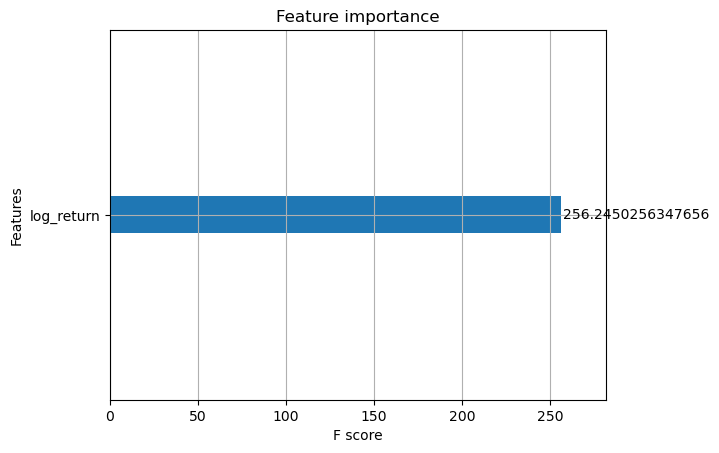

In [15]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xg_c,max_num_features=10,importance_type='gain')#default='weight'
pyplot.show()

In [16]:
df_

,Open,High,Low,Close,Volume,log_return,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240
Date,,,,,,,,,,,,,
2014-12-23,7290.0,7290.0,7250.0,7290.0,2424.0,0.002060,1,7252.0,7275.5,7511.166667,7756.750000,8018.000000,7917.687500
2014-12-24,7300.0,7365.0,7265.0,7365.0,21753.0,0.010236,1,7269.0,7264.5,7491.000000,7741.333333,8015.125000,7912.687500
2014-12-26,7400.0,7420.0,7360.0,7385.0,7384.0,0.002712,1,7292.0,7271.0,7472.333333,7726.416667,8013.458333,7909.062500
2014-12-29,7465.0,7465.0,7320.0,7340.0,10208.0,-0.006112,0,7319.0,7284.0,7454.666667,7713.583333,8011.916667,7905.520833
2014-12-30,7375.0,7375.0,7110.0,7135.0,30329.0,-0.028327,0,7331.0,7287.5,7441.666667,7703.583333,8010.083333,7902.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05,7950.0,8075.0,7935.0,7985.0,393780.0,-0.009349,0,8041.0,8262.5,8236.166667,7675.500000,7043.416667,6568.604167
2024-04-08,8000.0,8130.0,7980.0,8055.0,748528.0,0.008728,1,8000.0,8190.5,8241.833333,7700.833333,7056.083333,6576.270833
2024-04-09,8085.0,8140.0,7985.0,8030.0,423717.0,-0.003108,0,8000.0,8137.5,8246.166667,7727.583333,7069.416667,6583.479167


In [17]:
base = pd.read_csv('c:/Users/chanyoung/Desktop/young_workspace/ba_module1/ML_pjt/BANK_pjt/base.csv',index_col=0)
base.index.name = 'Date'
base.rename(columns = {'한국은행 기준금리':'base'},inplace = True)
# 결과 확인
base

,base
Date,
2013-01-01,2.75
2013-01-02,2.75
2013-01-03,2.75
2013-01-04,2.75
2013-01-05,2.75
...,...
2024-04-07,3.50
2024-04-08,3.50
2024-04-09,3.50


In [18]:
# merge
df_ = pd.merge(df_, base, on='Date', how='inner')

df_

,Open,High,Low,Close,Volume,log_return,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,base
Date,,,,,,,,,,,,,,
2014-12-23,7290.0,7290.0,7250.0,7290.0,2424.0,0.002060,1,7252.0,7275.5,7511.166667,7756.750000,8018.000000,7917.687500,2.0
2014-12-24,7300.0,7365.0,7265.0,7365.0,21753.0,0.010236,1,7269.0,7264.5,7491.000000,7741.333333,8015.125000,7912.687500,2.0
2014-12-26,7400.0,7420.0,7360.0,7385.0,7384.0,0.002712,1,7292.0,7271.0,7472.333333,7726.416667,8013.458333,7909.062500,2.0
2014-12-29,7465.0,7465.0,7320.0,7340.0,10208.0,-0.006112,0,7319.0,7284.0,7454.666667,7713.583333,8011.916667,7905.520833,2.0
2014-12-30,7375.0,7375.0,7110.0,7135.0,30329.0,-0.028327,0,7331.0,7287.5,7441.666667,7703.583333,8010.083333,7902.104167,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04,7955.0,8145.0,7940.0,8060.0,606270.0,0.023220,1,8096.0,8328.5,8226.500000,7648.166667,7029.708333,6560.645833,3.5
2024-04-05,7950.0,8075.0,7935.0,7985.0,393780.0,-0.009349,0,8041.0,8262.5,8236.166667,7675.500000,7043.416667,6568.604167,3.5
2024-04-08,8000.0,8130.0,7980.0,8055.0,748528.0,0.008728,1,8000.0,8190.5,8241.833333,7700.833333,7056.083333,6576.270833,3.5


In [ ]:
# cofix = pd.read_csv('c:/Users/chanyoung/Desktop/young_workspace/ba_module1/ML_pjt/BANK_pjt/cofix.csv',index_col=0)
# cofix.index.name = 'Date'
# cofix.rename(columns = {'신규취급액기준 COFIX':'cofix'},inplace = True)
# # 결과 확인
# cofix

In [20]:
cofix_short = pd.read_csv('c:/Users/chanyoung/Desktop/young_workspace/ba_module1/ML_pjt/BANK_pjt/cofix_short.csv',index_col=0)
cofix_short.index.name = 'Date'
cofix_short.rename(columns = {'단기 COFIX':'cofix_short'},inplace = True)
# 결과 확인
cofix_short

,cofix_short
Date,
2024-04-05,3.57
2024-04-04,3.57
2024-04-03,3.57
2024-04-02,3.57
2024-04-01,3.57
...,...
2012-12-26,2.95
2012-12-25,2.95
2012-12-24,2.95


In [21]:
# merge
df_ = pd.merge(df_, cofix_short, on='Date', how='inner')

df_

,Open,High,Low,Close,Volume,log_return,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,base,cofix_short
Date,,,,,,,,,,,,,,,
2014-12-23,7290.0,7290.0,7250.0,7290.0,2424.0,0.002060,1,7252.0,7275.5,7511.166667,7756.750000,8018.000000,7917.687500,2.0,2.00
2014-12-24,7300.0,7365.0,7265.0,7365.0,21753.0,0.010236,1,7269.0,7264.5,7491.000000,7741.333333,8015.125000,7912.687500,2.0,2.00
2014-12-26,7400.0,7420.0,7360.0,7385.0,7384.0,0.002712,1,7292.0,7271.0,7472.333333,7726.416667,8013.458333,7909.062500,2.0,2.00
2014-12-29,7465.0,7465.0,7320.0,7340.0,10208.0,-0.006112,0,7319.0,7284.0,7454.666667,7713.583333,8011.916667,7905.520833,2.0,2.05
2014-12-30,7375.0,7375.0,7110.0,7135.0,30329.0,-0.028327,0,7331.0,7287.5,7441.666667,7703.583333,8010.083333,7902.104167,2.0,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,8190.0,8205.0,8010.0,8055.0,886870.0,-0.016621,0,8381.0,8471.5,8218.333333,7572.583333,6988.500000,6537.666667,3.5,3.57
2024-04-02,8005.0,8085.0,7925.0,8025.0,978698.0,-0.003731,0,8275.0,8423.0,8224.833333,7597.583333,7004.000000,6545.458333,3.5,3.57
2024-04-03,8000.0,8035.0,7870.0,7875.0,783412.0,-0.018868,0,8174.0,8389.0,8224.000000,7623.750000,7017.708333,6553.375000,3.5,3.57


In [22]:
exchange = pd.read_csv('c:/Users/chanyoung/Desktop/young_workspace/ba_module1/ML_pjt/BANK_pjt/exchange.csv',index_col=0)
exchange.index.name = 'Date'
exchange.rename(columns = {'환율':'exchange'},inplace = True)
# 결과 확인
exchange

,exchange
Date,
2013-12-27,1053.9
2013-12-30,1055.4
2014-01-02,1050.3
2014-01-03,1055.2
2014-01-06,1065.4
...,...
2024-04-05,1352.8
2024-04-08,1353.2
2024-04-09,1354.9


In [23]:
# merge
df_ = pd.merge(df_, exchange, on='Date', how='inner')

df_

,Open,High,Low,Close,Volume,log_return,target,moving_average_5,moving_average_10,moving_average_30,moving_average_60,moving_average_120,moving_average_240,base,cofix_short,exchange
Date,,,,,,,,,,,,,,,,
2014-12-23,7290.0,7290.0,7250.0,7290.0,2424.0,0.002060,1,7252.0,7275.5,7511.166667,7756.750000,8018.000000,7917.687500,2.0,2.00,1102.7
2014-12-24,7300.0,7365.0,7265.0,7365.0,21753.0,0.010236,1,7269.0,7264.5,7491.000000,7741.333333,8015.125000,7912.687500,2.0,2.00,1102.6
2014-12-26,7400.0,7420.0,7360.0,7385.0,7384.0,0.002712,1,7292.0,7271.0,7472.333333,7726.416667,8013.458333,7909.062500,2.0,2.00,1098.7
2014-12-29,7465.0,7465.0,7320.0,7340.0,10208.0,-0.006112,0,7319.0,7284.0,7454.666667,7713.583333,8011.916667,7905.520833,2.0,2.05,1097.8
2014-12-30,7375.0,7375.0,7110.0,7135.0,30329.0,-0.028327,0,7331.0,7287.5,7441.666667,7703.583333,8010.083333,7902.104167,2.0,2.05,1099.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,8190.0,8205.0,8010.0,8055.0,886870.0,-0.016621,0,8381.0,8471.5,8218.333333,7572.583333,6988.500000,6537.666667,3.5,3.57,1349.4
2024-04-02,8005.0,8085.0,7925.0,8025.0,978698.0,-0.003731,0,8275.0,8423.0,8224.833333,7597.583333,7004.000000,6545.458333,3.5,3.57,1352.1
2024-04-03,8000.0,8035.0,7870.0,7875.0,783412.0,-0.018868,0,8174.0,8389.0,8224.000000,7623.750000,7017.708333,6553.375000,3.5,3.57,1348.9


In [24]:
df_.to_csv('data_for_bank_all.csv')